In [4]:
import os
# os.chdir('./code')
# os.chdir('../')
print(os.getcwd())

c:\Users\giorg\OneDrive\Έγγραφα\Σχολή\7ο εξάμηνο\Νευρωνικά Δίκτυα\SVM on CIFAR-10


In [3]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
# Ensure read_data.py is in the same directory or provide the correct path
try:
	from read_data import read_data
except ModuleNotFoundError:
	print("Module read_data not found. Please ensure read_data.py is in the working directory.")
from scaler import MyScaler
from accuracy_metrics import cls_report, accuracy
import time
import numpy as np

In [8]:
# Read the data
X_train, y_train = read_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [9]:
# Initialize the scaler
scaler: MyScaler = MyScaler.load_scaler('scaler.pkl')
print('Loaded scaler')

Loaded scaler


In [10]:
# Normalize the data
X_train_normalized = scaler.normalize_data(X_train)
X_val_normalized = scaler.normalize_data(X_val)
print('Normalized data')
print(X_train_normalized.shape)

X_train_umap = scaler.umap_decomposition(X_train_normalized)
X_val_umap = scaler.umap_decomposition(X_val_normalized)
print('UMAP decomposition')
print(X_train_umap.shape)

Normalized data
(9000, 3072)
UMAP decomposition
(9000, 50)


In [11]:
print(f'Components of UMAP {scaler.umap.n_components}')

Components of UMAP 50


In [12]:
# PCA decomposition
X_train_pca = scaler.pca_decomposition(X_train_normalized)
X_val_pca = scaler.pca_decomposition(X_val_normalized)

In [13]:
print('Components of PCA', scaler.pca.n_components_)

Components of PCA 225


In [14]:
def fit_poly_kernel(X_train, y_train, degree, C):
    start = time.time()
    # Train a polynomial kernel SVM model
    poly_model = SVC(kernel='poly', degree=degree, C=C, decision_function_shape='ovo')
    poly_model.fit(X_train, y_train)
    end = time.time()
    print(f'Polynomial kernel model of degree {degree} trained in {end - start:.2f} seconds')
    return poly_model, end - start

In [15]:
# Prediction on training set
def predict(model: SVC, X, y, data_set='training'):
    start = time.time()
    y_pred = model.predict(X)
    end = time.time()
    print(f'OvO model predicted in {end - start} seconds')
    acc = accuracy(y, y_pred)
    print(f'OvO model {data_set} accuracy: ', acc)
    return acc

In [19]:
# Plot training and validation accuracy for different degrees of polynomial kernel

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
C = 1
train_acc = []
val_acc = []
train_times = []
num_support_vectors = []
for degree in degrees:
    print(f'Degree: {degree}')
    poly_model, train_time = fit_poly_kernel(X_train_pca, y_train, degree, C)
    train_acc.append(predict(poly_model, X_train_pca, y_train, data_set='training'))
    val_acc.append(predict(poly_model, X_val_pca, y_val, data_set='validation'))
    train_times.append(train_time)
    num_support_vectors.append(poly_model.n_support_)
    print('Support vectors:', num_support_vectors[-1])

print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)


Degree: 1
Polynomial kernel model of degree 1 trained in 3.84 seconds
OvO model predicted in 1.270221471786499 seconds
OvO model training accuracy:  0.8757777777777778
OvO model predicted in 0.14168930053710938 seconds
OvO model validation accuracy:  0.869
Support vectors: [1586 1577]
Degree: 2
Polynomial kernel model of degree 2 trained in 6.07 seconds
OvO model predicted in 2.638535976409912 seconds
OvO model training accuracy:  0.9103333333333333
OvO model predicted in 0.29361772537231445 seconds
OvO model validation accuracy:  0.86
Support vectors: [2604 2616]
Degree: 3
Polynomial kernel model of degree 3 trained in 5.55 seconds
OvO model predicted in 2.2116644382476807 seconds
OvO model training accuracy:  0.9488888888888889
OvO model predicted in 0.2453463077545166 seconds
OvO model validation accuracy:  0.87
Support vectors: [2251 2289]
Degree: 4
Polynomial kernel model of degree 4 trained in 7.90 seconds
OvO model predicted in 4.7474610805511475 seconds
OvO model training accur

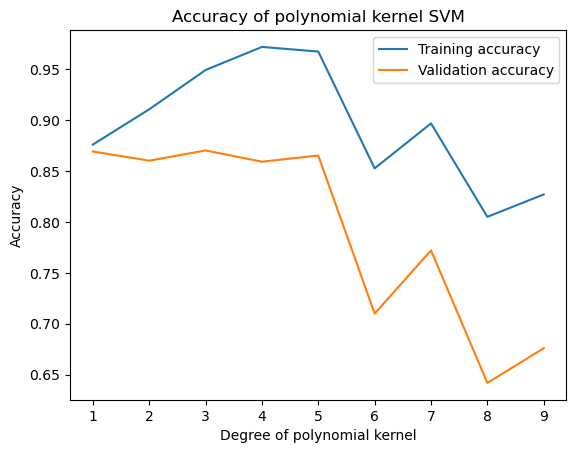

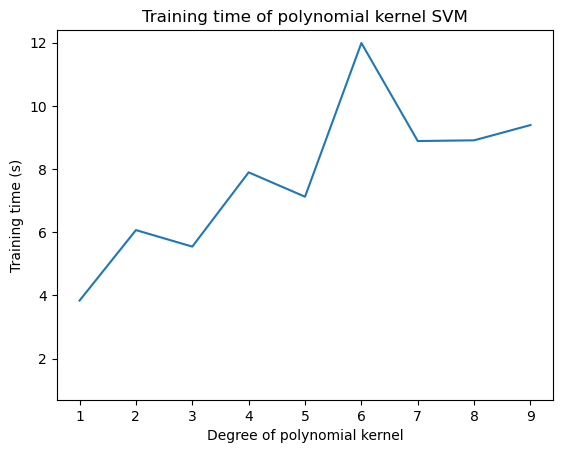

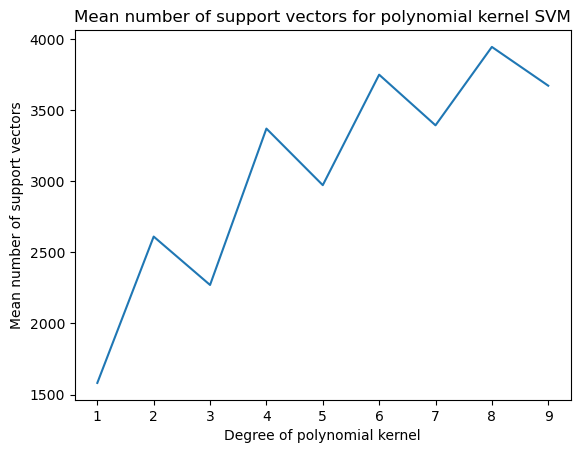

In [20]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(degrees, train_acc, label='Training accuracy')
plt.plot(degrees, val_acc, label='Validation accuracy')
plt.xlabel('Degree of polynomial kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of polynomial kernel SVM')
plt.legend()
plt.show()

# σχετικά σταθερό - αυξάνεται με τον βαθμό του πολυωνυμικού πυρήνα κυρίως λόγω της 
# αύξησης των support vectors που χρησιμοποιούνται
plt.plot(degrees, train_times)
plt.xlabel('Degree of polynomial kernel')
plt.ylabel('Training time (s)')
plt.ylim(bottom=0.7)
plt.title('Training time of polynomial kernel SVM')
plt.show()


# Plot mean number of support vectors for each degree of polynomial kernel
num_support_vectors = np.array(num_support_vectors)
mean_support_vectors = num_support_vectors.mean(axis=1)
plt.plot(degrees, mean_support_vectors)
plt.xlabel('Degree of polynomial kernel')
plt.ylabel('Mean number of support vectors')
plt.title('Mean number of support vectors for polynomial kernel SVM')
plt.show()



In [22]:
# Test various values of C for poly degree 3
C_values = [0.1, 1, 10, 100, 1000]
train_acc2 = []
val_acc2 = []
train_times2 = []
num_support_vectors2 = []
for C in C_values:
    print(f'C: {C}')
    poly_model, train_time = fit_poly_kernel(X_train_pca, y_train, 3, C)
    train_acc2.append(predict(poly_model, X_train_pca, y_train, data_set='training'))
    val_acc2.append(predict(poly_model, X_val_pca, y_val, data_set='validation'))
    train_times2.append(train_time)
    num_support_vectors2.append(poly_model.n_support_)



C: 0.1
Polynomial kernel model of degree 3 trained in 6.72 seconds
OvO model predicted in 4.060559034347534 seconds
OvO model training accuracy:  0.8762222222222222
OvO model predicted in 0.3903369903564453 seconds
OvO model validation accuracy:  0.856
C: 1
Polynomial kernel model of degree 3 trained in 6.10 seconds
OvO model predicted in 2.596330165863037 seconds
OvO model training accuracy:  0.9488888888888889
OvO model predicted in 0.29486775398254395 seconds
OvO model validation accuracy:  0.87
C: 10
Polynomial kernel model of degree 3 trained in 6.22 seconds
OvO model predicted in 2.4640145301818848 seconds
OvO model training accuracy:  0.9958888888888889
OvO model predicted in 0.2540748119354248 seconds
OvO model validation accuracy:  0.862
C: 100
Polynomial kernel model of degree 3 trained in 6.15 seconds
OvO model predicted in 1.823838710784912 seconds
OvO model training accuracy:  1.0
OvO model predicted in 0.26793813705444336 seconds
OvO model validation accuracy:  0.849
C: 1

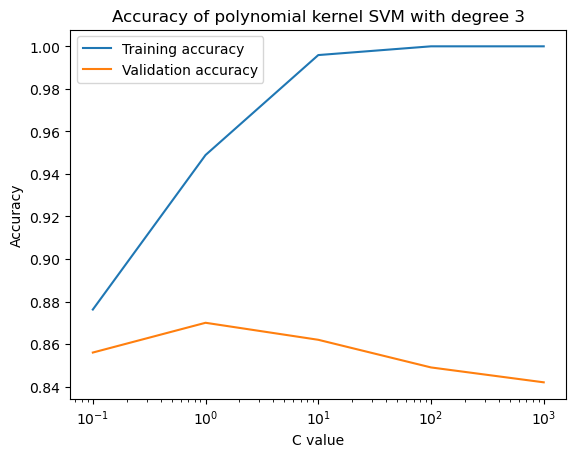

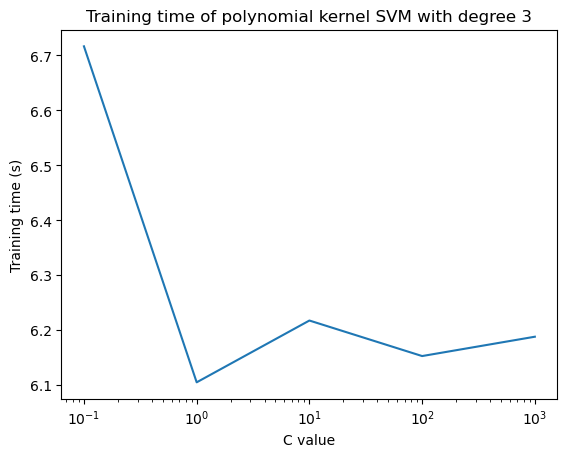

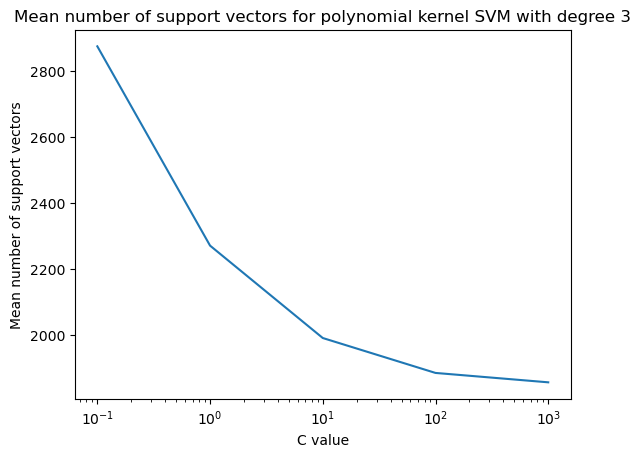

In [23]:
# Plot the training and validation accuracy
plt.plot(C_values, train_acc2, label='Training accuracy')
plt.plot(C_values, val_acc2, label='Validation accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy of polynomial kernel SVM with degree 3')
plt.legend()
plt.xscale('log')
plt.show()

# Plot training time for different values of C
plt.plot(C_values, train_times2)
plt.xlabel('C value')
plt.ylabel('Training time (s)')
plt.title('Training time of polynomial kernel SVM with degree 3')
plt.xscale('log')
plt.show()

# Plot mean number of support vectors for each value of C
num_support_vectors2 = np.array(num_support_vectors2)
mean_support_vectors2 = num_support_vectors2.mean(axis=1)
plt.plot(C_values, mean_support_vectors2)
plt.xlabel('C value')
plt.ylabel('Mean number of support vectors')
plt.title('Mean number of support vectors for polynomial kernel SVM with degree 3')
plt.xscale('log')
plt.show()




In [24]:
# Train an rbf kernel SVM model
def fit_rbf_kernel(X_train, y_train, C, gamma):
    start = time.time()
    rbf_model = SVC(kernel='rbf', C=C, decision_function_shape='ovo')
    rbf_model.fit(X_train, y_train)
    end = time.time()
    print(f'RBF kernel model trained in {end - start:.2f} seconds')
    return rbf_model

In [25]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

# Initialize the RBF kernel SVM model
rbf_model = SVC(kernel='rbf', decision_function_shape='ovo')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rbf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict using the best model
best_model = grid_search.best_estimator_
predict(best_model, X_train_pca, y_train, data_set='training')
predict(best_model, X_val_pca, y_val, data_set='validation')
# Extract the results from the grid search
results = grid_search.cv_results_

# Reshape the results into a matrix
scores_matrix = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))



Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'C': 10, 'gamma': 0.0001}
Best cross-validation score: 0.906888888888889
OvO model predicted in 5.220660209655762 seconds
OvO model training accuracy:  0.9628888888888889
OvO model predicted in 0.5858504772186279 seconds
OvO model validation accuracy:  0.912


In [33]:
# Get the support vectors of each pair of parameters C and gamma
support_vectors = []
for i, C in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        rbf_model = fit_rbf_kernel(X_train_pca, y_train, C, gamma)
        support_vectors.append(rbf_model.n_support_)
print('Support vectors:', support_vectors)
support_vectors = np.array(support_vectors).mean(axis=1)

RBF kernel model trained in 5.79 seconds
RBF kernel model trained in 6.42 seconds
RBF kernel model trained in 5.77 seconds
RBF kernel model trained in 5.18 seconds
RBF kernel model trained in 5.74 seconds
RBF kernel model trained in 5.85 seconds
RBF kernel model trained in 4.41 seconds
RBF kernel model trained in 4.35 seconds
RBF kernel model trained in 4.26 seconds
RBF kernel model trained in 4.43 seconds
RBF kernel model trained in 4.18 seconds
RBF kernel model trained in 3.90 seconds
RBF kernel model trained in 4.74 seconds
RBF kernel model trained in 5.30 seconds
RBF kernel model trained in 5.36 seconds
RBF kernel model trained in 5.38 seconds
RBF kernel model trained in 5.51 seconds
RBF kernel model trained in 5.46 seconds
RBF kernel model trained in 5.22 seconds
RBF kernel model trained in 5.46 seconds
RBF kernel model trained in 5.51 seconds
RBF kernel model trained in 5.79 seconds
RBF kernel model trained in 5.66 seconds
RBF kernel model trained in 5.57 seconds
Support vectors:

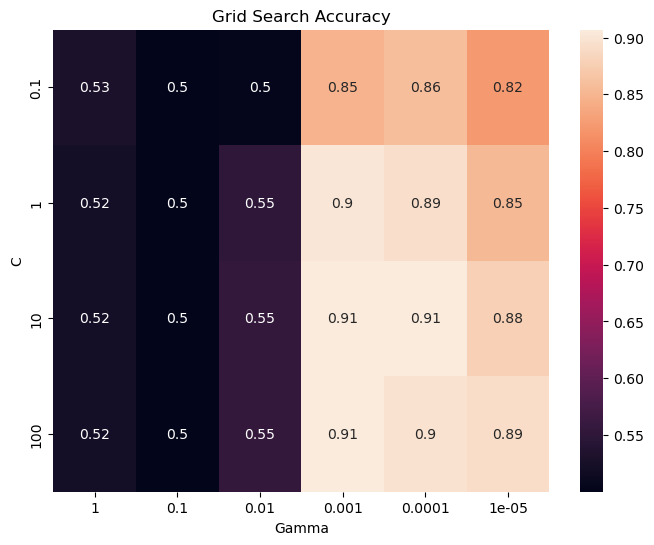

In [27]:
# Create a heatmap - with cross-validation scores - PCA
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy')
plt.show()



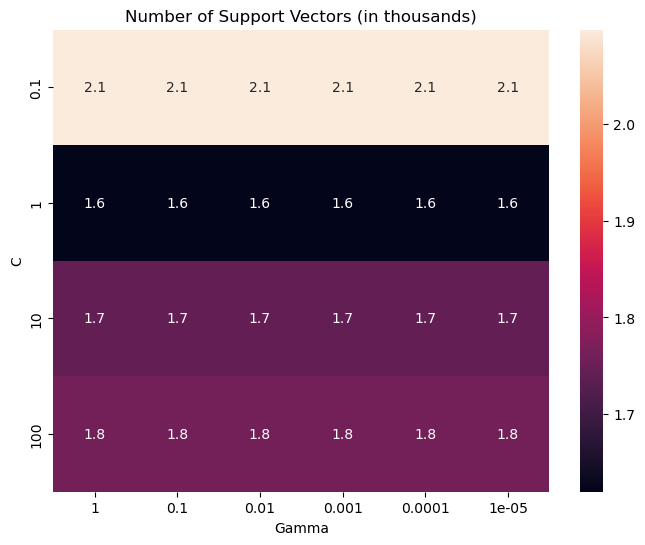

In [44]:
# Create a heatmap - with the mean number of support vectors in thousands - PCA
support_vectors /= 1000
support_vectors_matrix = support_vectors.reshape(len(param_grid['C']), len(param_grid['gamma']))
plt.figure(figsize=(8, 6))
sns.heatmap(support_vectors_matrix, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Number of Support Vectors (in thousands)')
plt.show()
